In [14]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [15]:
data = pd.read_csv('Mall_Customers.csv')
data.dropna(inplace=True)
data.head()

,CustomerID,Genre,Age,Income(k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


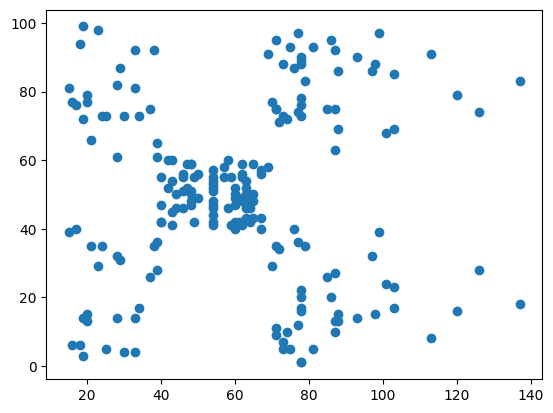

In [16]:
plt.scatter(data["Income(k$)"], data["Spending Score"])

In [17]:
scaler = StandardScaler()
data["Scaled Income"] = scaler.fit_transform(data[["Income(k$)"]])
data["Scaled Spending Score"] = scaler.fit_transform(data[["Spending Score"]])
data.head()

,CustomerID,Genre,Age,Income(k$),Spending Score,Scaled Income,Scaled Spending Score
0,1,Male,19,15,39,-1.738999,-0.434801
1,2,Male,21,15,81,-1.738999,1.195704
2,3,Female,20,16,6,-1.700830,-1.715913
3,4,Female,23,16,77,-1.700830,1.040418
4,5,Female,31,17,40,-1.662660,-0.395980


In [18]:
k = range(1,10)
sse = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(data[["Scaled Income", "Scaled Spending Score"]])
    sse.append(kmeans.inertia_)

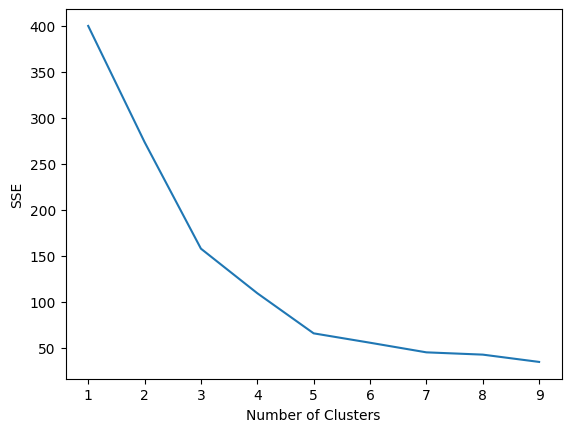

In [19]:
plt.plot(k, sse)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [20]:
k=5 #elbow method
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(data[["Scaled Income", "Scaled Spending Score"]])
predicted = kmeans.predict(data[["Scaled Income", "Scaled Spending Score"]])

In [21]:
data["Kmeans_Cluster"] = predicted
data.head()

,CustomerID,Genre,Age,Income(k$),Spending Score,Scaled Income,Scaled Spending Score,Kmeans_Cluster
0,1,Male,19,15,39,-1.738999,-0.434801,4
1,2,Male,21,15,81,-1.738999,1.195704,2
2,3,Female,20,16,6,-1.700830,-1.715913,4
3,4,Female,23,16,77,-1.700830,1.040418,2
4,5,Female,31,17,40,-1.662660,-0.395980,4


In [22]:
original_centers = scaler.inverse_transform(kmeans.cluster_centers_)

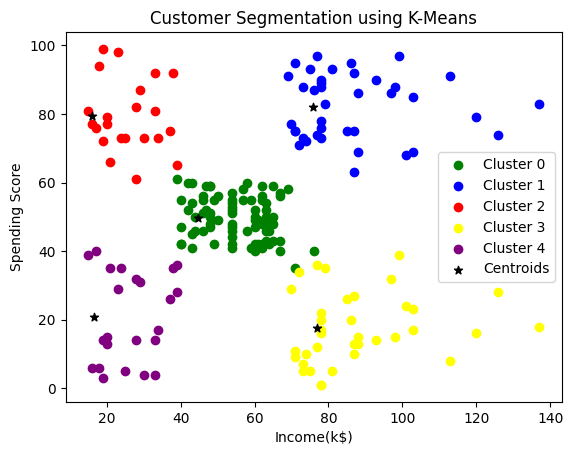

In [23]:
plt.scatter(data[data.Kmeans_Cluster == 0]["Income(k$)"], 
            data[data.Kmeans_Cluster == 0]["Spending Score"], 
            color="green", label="Cluster 0")
plt.scatter(data[data.Kmeans_Cluster == 1]["Income(k$)"], 
            data[data.Kmeans_Cluster == 1]["Spending Score"], 
            color="blue", label="Cluster 1")
plt.scatter(data[data.Kmeans_Cluster == 2]["Income(k$)"], 
            data[data.Kmeans_Cluster == 2]["Spending Score"], 
            color="red", label="Cluster 2")
plt.scatter(data[data.Kmeans_Cluster == 3]["Income(k$)"], 
            data[data.Kmeans_Cluster == 3]["Spending Score"], 
            color="yellow", label="Cluster 3")
plt.scatter(data[data.Kmeans_Cluster == 4]["Income(k$)"], 
            data[data.Kmeans_Cluster == 4]["Spending Score"], 
            color="purple", label="Cluster 4")

plt.scatter(original_centers[:,0], original_centers[:,1], color="black", marker = "*", label="Centroids")
plt.xlabel("Income(k$)")
plt.ylabel("Spending Score")
plt.legend()
plt.title("Customer Segmentation using K-Means")
plt.show()



In [24]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss
import numpy as np
import itertools

In [25]:
#Optimizing DBSCAN Based on Silhouette Score
def get_scores_and_labels(combinations, data):
    scores = []
    all_labels = []
    for i, (eps,num_samples) in enumerate(combinations):
        model = DBSCAN(eps=eps, min_samples=num_samples).fit(data)
        labels = model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        
        if -1 in labels_set:
            num_clusters -= 1
        
        if num_clusters < 2 or num_clusters > 50:
            scores.append(-1)
            all_labels.append(-1)
            print(f"Combination {int(eps), int(num_samples)} on iteration {i+1} has {num_clusters} clusters, Skipping")
            continue
        
        scores.append(ss(data, labels))
        all_labels.append(labels)
        print(f"Index: {i}, Score: {scores[-1]}, Number of clusters: {num_clusters}")
        
        best_index = np.argmax(scores)
        best_parameters = combinations[best_index]
        best_score = scores[best_index]
        best_label = all_labels[best_index]
        
    return {'best_eps' : float(best_parameters[0]), 
            'best_min_samples': int(best_parameters[1]),
            'best_score' : best_score, 
            'best_label' : best_label}
            

In [26]:
#Testing Values for DBSCAN Optimization
epsilons = np.linspace(0.01, 1, 10)
min_samples = np.arange(1,20)
combinations = list(itertools.product(epsilons, min_samples))

In [27]:
best_dict= get_scores_and_labels(combinations, data[["Scaled Income", "Scaled Spending Score"]])
data["DBSCAN_Cluster"] = best_dict["best_label"]

Combination (0, 1) on iteration 1 has 196 clusters, Skipping
Index: 1, Score: -0.5039775112770212, Number of clusters: 4
Combination (0, 3) on iteration 3 has 0 clusters, Skipping
Combination (0, 4) on iteration 4 has 0 clusters, Skipping
Combination (0, 5) on iteration 5 has 0 clusters, Skipping
Combination (0, 6) on iteration 6 has 0 clusters, Skipping
Combination (0, 7) on iteration 7 has 0 clusters, Skipping
Combination (0, 8) on iteration 8 has 0 clusters, Skipping
Combination (0, 9) on iteration 9 has 0 clusters, Skipping
Combination (0, 10) on iteration 10 has 0 clusters, Skipping
Combination (0, 11) on iteration 11 has 0 clusters, Skipping
Combination (0, 12) on iteration 12 has 0 clusters, Skipping
Combination (0, 13) on iteration 13 has 0 clusters, Skipping
Combination (0, 14) on iteration 14 has 0 clusters, Skipping
Combination (0, 15) on iteration 15 has 0 clusters, Skipping
Combination (0, 16) on iteration 16 has 0 clusters, Skipping
Combination (0, 17) on iteration 17 has

In [29]:
best_dict

{'best_eps': 0.34,
 'best_min_samples': 3,
 'best_score': 0.4710956057910501,
 'best_label': array([ 0,  1,  2,  1,  0,  1,  2,  3,  2,  1,  2,  3,  2,  1,  2,  1,  0,
         1,  0,  3,  0,  1,  2,  1,  2,  1,  0,  1,  0,  1,  2,  1,  2,  1,
         2,  1,  2,  1,  4,  1,  4,  1,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  5,  4,  5,  4,  5,  6,  5,  6,  5,  4,  5,  6,  5,
         6,  5,  6,  5,  6,  5,  4,  5,  6,  5,  4,  5,  6,  5,  6,  5,  6,
         5,  6,  5,  6,  5,  6,  5,  4,  5,  6,  5,  6,  5,  6,  5,  6,  5,
         6,  5,  6,  5,  6,  5,  6,  5,  6,  5, -1,  5,  6,  5, -1, -1,  6,
        -1,  6,  5,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1])}

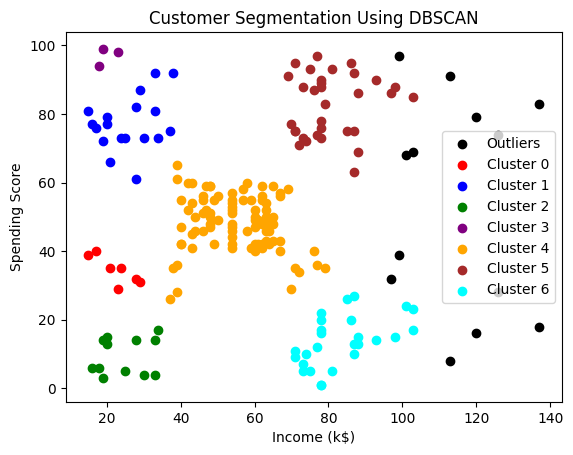

In [28]:
plt.scatter(data[data.DBSCAN_Cluster == -1]["Income(k$)"],
            data[data.DBSCAN_Cluster == -1]["Spending Score"],
            color="black", label="Outliers")

plt.scatter(data[data.DBSCAN_Cluster == 0]["Income(k$)"],
            data[data.DBSCAN_Cluster == 0]["Spending Score"],
            color="red", label="Cluster 0")

plt.scatter(data[data.DBSCAN_Cluster == 1]["Income(k$)"],
            data[data.DBSCAN_Cluster == 1]["Spending Score"],
            color="blue", label="Cluster 1")

plt.scatter(data[data.DBSCAN_Cluster == 2]["Income(k$)"],
            data[data.DBSCAN_Cluster == 2]["Spending Score"],
            color="green", label="Cluster 2")

plt.scatter(data[data.DBSCAN_Cluster == 3]["Income(k$)"],
            data[data.DBSCAN_Cluster== 3]["Spending Score"],
            color="purple", label="Cluster 3")

plt.scatter(data[data.DBSCAN_Cluster == 4]["Income(k$)"],
            data[data.DBSCAN_Cluster == 4]["Spending Score"],
            color="orange", label="Cluster 4")

plt.scatter(data[data.DBSCAN_Cluster == 5]["Income(k$)"],
            data[data.DBSCAN_Cluster == 5]["Spending Score"],
            color="brown", label="Cluster 5")

plt.scatter(data[data.DBSCAN_Cluster == 6]["Income(k$)"],
            data[data.DBSCAN_Cluster == 6]["Spending Score"],
            color="cyan", label="Cluster 6")

plt.xlabel("Income (k$)")
plt.ylabel("Spending Score")
plt.legend()
plt.title("Customer Segmentation Using DBSCAN")
plt.show()
